<a href="https://colab.research.google.com/github/Ruqyai/MENADD-DL/blob/main/CNN/mnist_LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten,AveragePooling2D,Conv2D
from keras.optimizers import SGD, Adam, RMSprop
from keras.utils import np_utils
from keras.datasets import mnist
from pathlib import Path

In [ ]:

(train_x,train_y),(test_x,test_y)=mnist.load_data()

train_x=np.reshape(train_x,(-1,28,28,1))
print("train_x.shape:{}".format(train_x.shape))
train_y=np_utils.to_categorical(train_y,10)
print("train_y.shape:{}".format(train_y.shape))

test_x=np.reshape(test_x,(-1,28,28,1))
print("test_x.shape:{}".format(test_x.shape))
test_y=np_utils.to_categorical(test_y,10)
print("test_y.shape:{}".format(test_y.shape))

train_x.shape:(60000, 28, 28, 1)
train_y.shape:(60000, 10)
test_x.shape:(10000, 28, 28, 1)
test_y.shape:(10000, 10)


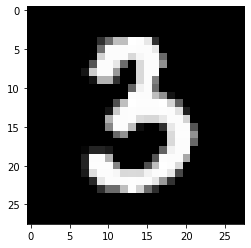

In [ ]:
index = np.random.randint(0, len(train_x))
image = train_x[index].squeeze()

plt.figure(figsize=(4,4))
plt.imshow(image, cmap="gray")

In [ ]:

model = Sequential()

model.add(Conv2D(filters = 6, kernel_size = (5,5), padding='same', strides=(1, 1), activation ='relu', input_shape = (28,28,1)))
model.add(AveragePooling2D(pool_size=(2,2) , strides=(2, 2)))
model.add(Conv2D(filters = 16, kernel_size = (5,5), padding='same', strides=(1, 1), activation ='relu'))
model.add(AveragePooling2D(pool_size=(2,2) , strides=(2, 2)))

model.add(Flatten())

model.add(Dense(120, activation = "relu"))

model.add(Dense(84, activation = "relu"))

model.add(Dense(10, activation = "softmax"))

In [ ]:

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# Output model structure
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        2416      
_________________________________________________________________
average_pooling2d_9 (Average (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               94200     
_________________________________________________________________
dense_13 (Dense)             (None, 84)               

In [ ]:
model.fit(train_x,train_y,
           batch_size=64,
           epochs=3,
           verbose=1,
           validation_data=(test_x,test_y))


Epoch 1/3
938/938 [==============================] - 41s 43ms/step - loss: 0.4943 - accuracy: 0.8886 - val_loss: 0.0630 - val_accuracy: 0.9795
Epoch 2/3
938/938 [==============================] - 41s 44ms/step - loss: 0.0603 - accuracy: 0.9816 - val_loss: 0.0453 - val_accuracy: 0.9846
Epoch 3/3
938/938 [==============================] - 41s 44ms/step - loss: 0.0407 - accuracy: 0.9876 - val_loss: 0.0504 - val_accuracy: 0.9834


In [ ]:
score = model.evaluate(test_x, test_y, verbose=1)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

313/313 [==============================] - 3s 11ms/step - loss: 0.0504 - accuracy: 0.9834
Val loss: 0.05035831034183502
Val accuracy: 0.9833999872207642
